In [112]:
%matplotlib inline
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from venn import venn
from collections import Counter
from matplotlib.colors import DivergingNorm

In [122]:
### load data
v = 'combined_default_srv_mh' 
dir_path = '/Users/osipova/Documents/LabDocs/NectarivoryProject/absrel/absrel_analysis_2024/{}/ClusterProfiler/'.format(v)

all_results = {}

nectar_clades    = ['hmmbrds', 'nectar_parrots', 'honeyeaters', 'sunbirds']
nonnectar_clades = ['swifts', 'falcons', 'lyrebirds', 'passerides']

clades = nectar_clades + nonnectar_clades
for clade in clades:
    file_name = 'goenrich.{}.under_selection_per_clade_0.05.tsv'.format(clade)
    file_data = glob(dir_path + file_name)[0]
    df = pd.read_csv(file_data, sep='\t')
    all_results[clade] = df

In [123]:
### Count in how many groups each GO is present

def count_gos(clades):
    all_goids = []
    for clade in clades:
        all_goids.extend(all_results[clade][all_results[clade]['pvalue'] < 0.05]['ID'])
    return Counter(all_goids)

nonnectar_go_count = count_gos(nonnectar_clades)
nectar_go_count = count_gos(nectar_clades)

rank3_nonnectar_go = [k for k in nonnectar_go_count if nonnectar_go_count[k] >= 3]
rank2_nectar_go = [k for k in nectar_go_count if nectar_go_count[k] >= 2]
rank3_nectar_go = [k for k in nectar_go_count if nectar_go_count[k] >= 3]
print(len(rank3_nonnectar_go))
print(len(rank2_nectar_go))
print(len(rank3_nectar_go))


12
92
14


In [124]:
### Exclude control GO ids from target

data_rank3_nectar = {}
for clade in nectar_clades:
    df_clade = all_results[clade]
    filt_df_clade = df_clade[(df_clade['ID'].isin(rank3_nectar_go) 
                              & (~df_clade['ID'].isin(rank3_nonnectar_go)))][['ID', 'Description', 'pvalue']]
    data_rank3_nectar[clade] = filt_df_clade
    
merged_df = pd.DataFrame({'ID': [], 'Description': []})
for clade in data_rank3_nectar:
    df = data_rank3_nectar[clade]
    df['logP_{}'.format(clade)] = np.log10(df['pvalue'])
    df.drop('pvalue', axis=1, inplace=True)
    merged_df = pd.merge(merged_df, df, on=['ID', 'Description'], how='outer')
    merged_df.set_index('Description', inplace=True)

In [125]:
merged_df

,ID,logP_hmmbrds,logP_nectar_parrots,logP_honeyeaters,logP_sunbirds
Description,,,,,
positive regulation of GTPase activity,GO:0043547,-3.973164,NaN,-1.327372,-1.589861
regulation of GTPase activity,GO:0043087,-3.018270,NaN,-1.376318,-1.685732
stabilization of membrane potential,GO:0030322,-2.375782,-1.716574,-2.744008,-1.699485
potassium ion export across plasma membrane,GO:0097623,-2.170356,NaN,-2.533662,-1.565282
potassium ion transmembrane transport,GO:0071805,-1.951562,NaN,-4.057453,-2.127332
potassium ion transport,GO:0006813,-1.663978,NaN,-4.238949,-1.870500
platelet-derived growth factor receptor signaling pathway,GO:0048008,-1.562392,NaN,-1.991310,-1.405752
apical protein localization,GO:0045176,-1.463887,-1.821715,-1.705403,NaN
negative regulation of digestive system process,GO:0060457,-1.362713,-1.716574,-1.601357,NaN


/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


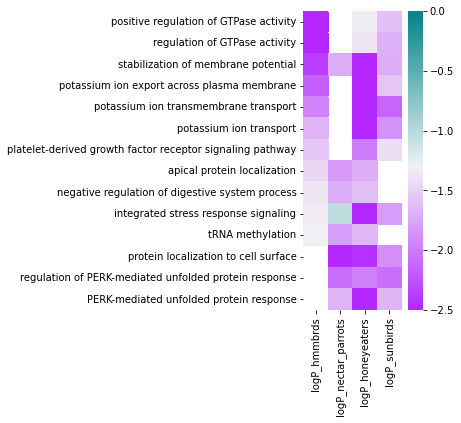

In [128]:
## purple color palette
cmap_pval = sns.diverging_palette(285, 200, 100, as_cmap=True)
divnorm_pval = DivergingNorm(vmin=-2.5, vmax=0, vcenter=np.log10(0.051))

pval_cols = [i for i in merged_df.columns if i.startswith('logP_')]
df_pval = merged_df[pval_cols]

fig, axes = plt.subplots(figsize=(2.2, 5.5))
sns.heatmap(data=df_pval, cmap=cmap_pval, norm=divnorm_pval)


# axes.set_xticklabels(df_pval['GO'])
axes.set_ylabel('')
fig.tight_layout()

pdf_name = 'clusterProfiler.absrel_2024_results.4_lists.pdf'
# plt.savefig(pdf_name, format='pdf', bbox_inches="tight")